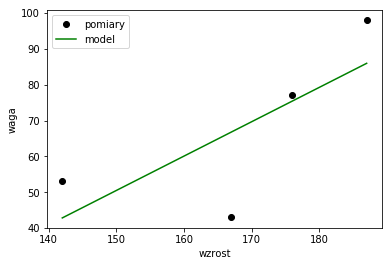

In [2]:
# pomiary wpisane z palca
from numpy import array
from matplotlib.pyplot import plot, show, legend, xlabel, ylabel

x = array([167, 187, 142, 176])  
y = array([43, 98, 53, 77])
N = x.size
plot(x, y, 'ko', label='pomiary')

x_avg, y_avg = x.mean(), y.mean()
a_est = ( (x*y).sum() - N*x_avg*y_avg ) / ( (x*x).sum() - N*x_avg*x_avg )
b_est = y_avg - a_est*x_avg

x_test = array( [x.min(), x.max()] )
y_model = a_est*x_test + b_est

plot(x_test, y_model, 'g', label='model')
legend(loc='upper left')
xlabel('wzrost')
ylabel('waga')
show()

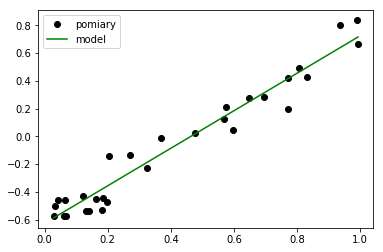

In [4]:
# pomiary generowane sztucznie
from numpy.random import rand, randn

N = 30;
x = rand(N)
a, b = 1.3, -0.6

z = 0.1*randn(x.size)
y = a*x + b + z
plot(x, y, 'ko', label='pomiary')

x_avg, y_avg = x.mean(), y.mean()
a_est = ( (x*y).sum() - N*x_avg*y_avg ) / ( (x*x).sum() - N*x_avg*x_avg )
b_est = y_avg - a_est*x_avg

x_test = array( [x.min(), x.max()] )
y_model = a_est*x_test + b_est

plot(x_test, y_model, 'g', label='model')
legend(loc='upper left')
show()

Optimization terminated successfully.
         Current function value: 2.642869
         Iterations: 52
         Function evaluations: 98


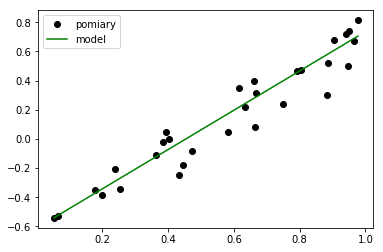

In [8]:
# minimalizujemy dowolne kryterium numerycznie fmin-em
from numpy import linspace
from scipy.optimize import fmin

N = 30;
x = rand(N)
a, b = 1.3, -0.6

z = 0.1*randn(x.size)
y = a*x + b + z
plot(x, y, 'ko', label='pomiary')


def Q(par, x, y):
    y_model = par[0]*x + par[1]
    return sum(abs(y-y_model))

par_init = rand(2)
par_est = fmin(Q, par_init, args=(x,y,))

x_test = linspace(x.min(), x.max() ,100)
y_model = par_est[0]*x_test + par_est[1]

plot(x_test, y_model, 'g', label='model')
legend(loc='upper left')
show()


[-0.53535918 -0.37242248  1.69845242  0.58212006 -1.53288912  0.50634341
  1.3039768  -0.15117148  1.78000245 -0.92336349  0.73082949 -5.21782099
  0.43678056 -1.71519103 -0.61272852  1.24616758  0.05317454  0.68468513
  2.35947163  0.21493463  2.04271415 -0.45944977  1.69048811  1.50158448
  0.92672266  0.83352803  0.42665397 -6.77488326  0.43209579 -0.52938945
  0.97315955 -1.80642799  0.22103343  0.08866141  0.26660709  0.09615598
  0.66414733  0.09277955  4.86073978  0.65895943 -3.42049417  0.19798544
 -0.03016147  0.1886855   1.36069536  0.749289    0.12623241  1.20178632
 -2.37265504 -8.17974391 -0.24250563 -0.71652384  0.45040138 -0.70307144
  0.26035945  0.05441509  0.38097913  3.50224891 -0.20727739 -0.22913228
 -0.42236664  2.36164213 -1.81095827  1.318778    0.10503688]


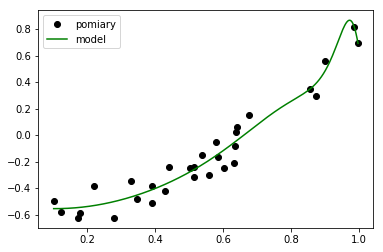

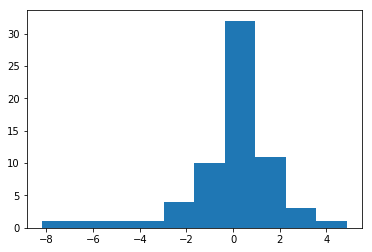

In [53]:
from matplotlib.pyplot import hist, figure
N = 30;
x = rand(N)
a, b = 1.3, -0.6

z = 0.1*randn(x.size)
y = a*x**2 + b + z
plot(x, y, 'ko', label='pomiary')


def model(par, x):
    y_model = par[0]
    for i in range(1,65):
        y_model += par[i]*x**i
    return y_model

def Q(par, x, y):
    y_model = model(par, x)
    return sum((y-y_model)**2)

par_init = rand(65)
par_est = fmin(Q, par_init, args=(x,y,))
print(par_est)

x_test = linspace(x.min(), x.max() ,300)
y_model = model(par_est, x_test)
figure(1)
plot(x_test, y_model, 'g', label='model')
legend(loc='upper left')
figure(2)
hist(par_est)
show()